In [3]:

import os
for dirname, _, filenames in os.walk('../input/covid19-image-dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



../input/covid19-image-dataset/Covid19-dataset/test/Normal/0117.jpeg
../input/covid19-image-dataset/Covid19-dataset/test/Normal/0101.jpeg
../input/covid19-image-dataset/Covid19-dataset/test/Normal/0108.jpeg
../input/covid19-image-dataset/Covid19-dataset/test/Normal/0110.jpeg
../input/covid19-image-dataset/Covid19-dataset/test/Normal/0119.jpeg
../input/covid19-image-dataset/Covid19-dataset/test/Normal/0115.jpeg
../input/covid19-image-dataset/Covid19-dataset/test/Normal/0116.jpeg
../input/covid19-image-dataset/Covid19-dataset/test/Normal/0105.jpeg
../input/covid19-image-dataset/Covid19-dataset/test/Normal/0106.jpeg
../input/covid19-image-dataset/Covid19-dataset/test/Normal/0121.jpeg
../input/covid19-image-dataset/Covid19-dataset/test/Normal/0111.jpeg
../input/covid19-image-dataset/Covid19-dataset/test/Normal/0103.jpeg
../input/covid19-image-dataset/Covid19-dataset/test/Normal/0120.jpeg
../input/covid19-image-dataset/Covid19-dataset/test/Normal/0122.jpeg
../input/covid19-image-dataset/Cov

In [30]:
import tensorflow as tf
import numpy as np
import os
from matplotlib import pyplot as plt
import cv2
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D #images are two dimensional. Videos are three dimension.
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Plotting Various Scan Reports

**Covid Patient**

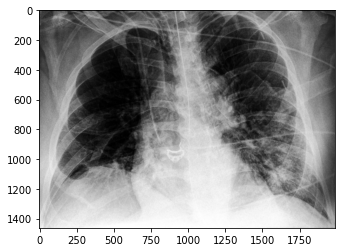

In [31]:
plt.imshow(cv2.imread("../input/covid19-image-dataset/Covid19-dataset/train/Covid/022.jpeg"))

**Pneumomnia Patient**

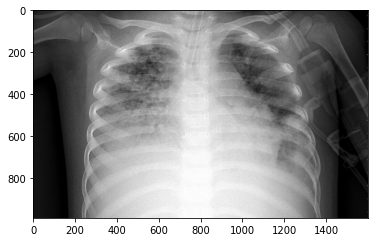

In [32]:
plt.imshow(cv2.imread("../input/covid19-image-dataset/Covid19-dataset/train/Viral Pneumonia/020.jpeg"))

**Normal Patient**

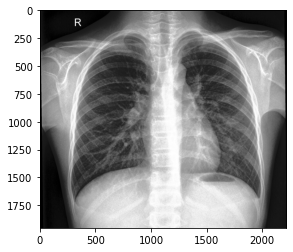

In [33]:
plt.imshow(cv2.imread("../input/covid19-image-dataset/Covid19-dataset/train/Normal/018.jpeg"))

# Preprocessing the images

In [88]:
train_datagen=ImageDataGenerator(rescale=1/255,
                                shear_range=0.2,
                                zoom_range=2,
                                horizontal_flip=True)
training_set=train_datagen.flow_from_directory('../input/covid19-image-dataset/Covid19-dataset/train',
                                              target_size=(224,224),
                                              batch_size=32)

Found 251 images belonging to 3 classes.


In [89]:
training_set.class_indices

{'Covid': 0, 'Normal': 1, 'Viral Pneumonia': 2}

In [90]:
test_datagen=ImageDataGenerator(rescale=1/255,
                               shear_range=0.2,
                               zoom_range=2,
                               horizontal_flip=True)
test_set=test_datagen.flow_from_directory('../input/covid19-image-dataset/Covid19-dataset/test',
                                         target_size=(224,224),
                                         batch_size=32)

Found 66 images belonging to 3 classes.


In [91]:
test_set.class_indices

{'Covid': 0, 'Normal': 1, 'Viral Pneumonia': 2}

# Building VGG-16 architecture & Neural Network

In [92]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),strides=(1, 1),activation='relu',padding='same', input_shape=(224, 224, 3)), 
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    
    tf.keras.layers.Conv2D(64,(3,3),strides=(1, 1) ,padding='same',activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),

    tf.keras.layers.Conv2D(128,(3,3),strides=(1, 1),padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),

    tf.keras.layers.Conv2D(256,(3,3),strides=(1, 1),padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),


    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax'),
])

In [93]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_fit = model.fit(training_set,
            epochs = 71,
            validation_data = test_set)

Epoch 1/71
8/8 [==============================] - 16s 2s/step - loss: 1.1425 - accuracy: 0.3302 - val_loss: 1.0993 - val_accuracy: 0.4091
Epoch 2/71
8/8 [==============================] - 14s 2s/step - loss: 1.0259 - accuracy: 0.5257 - val_loss: 1.0013 - val_accuracy: 0.4394
Epoch 3/71
8/8 [==============================] - 14s 2s/step - loss: 1.0064 - accuracy: 0.4887 - val_loss: 1.0497 - val_accuracy: 0.4242
Epoch 4/71
8/8 [==============================] - 14s 2s/step - loss: 0.9968 - accuracy: 0.5543 - val_loss: 1.0409 - val_accuracy: 0.5152
Epoch 5/71
8/8 [==============================] - 15s 2s/step - loss: 0.9630 - accuracy: 0.5299 - val_loss: 1.0379 - val_accuracy: 0.5303
Epoch 6/71
8/8 [==============================] - 14s 2s/step - loss: 0.9084 - accuracy: 0.5945 - val_loss: 0.9447 - val_accuracy: 0.5152
Epoch 7/71
8/8 [==============================] - 14s 2s/step - loss: 0.8535 - accuracy: 0.5974 - val_loss: 0.7613 - val_accuracy: 0.6970
Epoch 8/71
8/8 [==================

# Prediction

In [132]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('../input/covid19-image-dataset/Covid19-dataset/test/Viral Pneumonia/0112.jpeg', target_size = (224, 224))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
training_set.class_indices
print(result)

[[0.         0.00101711 0.99898285]]


[0,0,1] which means Pneumonia. Hence our model is accurate